# UM4MA379, Statistique Computationnelle, 2025-2026

Sorbonne Université, Master 1

Cours :  A. Guyader<br>
TP : M. Sangnier

## TP 2 : Intégration Monte-Carlo

# Table of contents
1. [Exercice 1 : Modèle fondamental en statistique bayésienne](#part1)
1. [Exercice 2 : Bayes, Cauchy et Gauss](#part2)
1. [Exercice 3 : Somme d'exponentielles et conditionnement](#part3)
1. [Exercice 4 : Test du rapport de vraisemblance](#part4)
1. [Exercice 5 : Vecteur gaussien et exponential tilting](#part5)
1. [Exercice 6 : Marche aléatoire avec dérive et échantillonnage préférentiel](#part6)


In [3]:
import numpy as np  # Vectors and matrices
from scipy import stats  # Probability distributions
import matplotlib.pyplot as plt  # Plots
from numpy.random import default_rng
rng = default_rng()
# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')


# Exercice 1 : Modèle fondamental en statistique bayésienne <a id="part1"></a>
>Dans un cadre bayésien, on considère que la loi a priori sur ${\boldsymbol \theta}$ est gaussienne standard et que, sachant ${\boldsymbol \theta}$, les observations $(X_i)_{1\leq i\leq n}$ sont i.i.d. selon une loi normale de moyenne ${\boldsymbol \theta}$ et de variance 1,
autrement dit :
\begin{cases}
    \boldsymbol \theta \sim \mathcal N(0, 1) \\
    (X_1, \dots, X_n) | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
    %\mathbf X | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
\end{cases}
>
>**Question 1.**
Rappeler la loi a posteriori de ${\boldsymbol \theta}$ sachant $\mathbf{X}=(X_1,\dots,X_n)$. 

**Réponse :**
…

In [ ]:
#on trouve que la loi a posteriori sachant X1,......,Xn est une normal centrée en n/(n+1) * (la moyenne empirique)
#de X1,...,Xn et une variance 1/(n+1)

>**Question 2.**
Effectuer un tirage de ${\boldsymbol \theta}$ suivant la loi gaussienne standard : on note $\theta_0$ cette réalisation.
Pour $n=10$, générer des réalisations des variables $X_1,\dots,X_n$ i.i.d. selon une loi normale de moyenne $\theta_0$ et de variance 1. Représenter sur un même graphique la densité a priori de ${\boldsymbol \theta}$ et les densités a posteriori des lois de ${\boldsymbol \theta}$ sachant $(X_1,X_2,X_3)$, sachant $(X_1,\dots,X_5)$ et sachant $(X_1,\dots,X_{10})$. Ajouter sur l'axe des abscisses les points de l'échantillon et leur moyenne empirique.

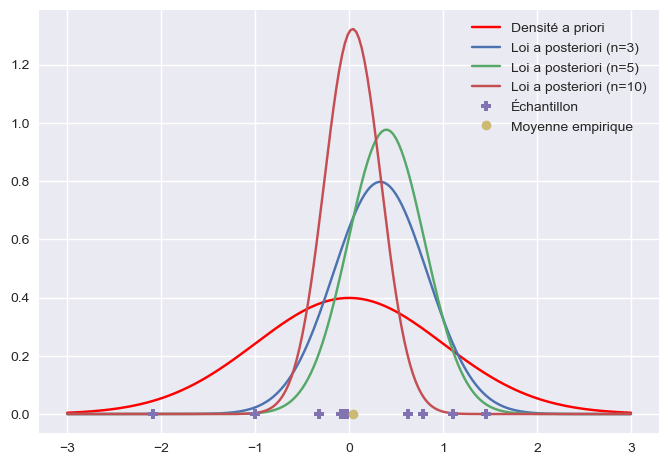

In [42]:
# Answer
prior = stats.norm(loc=0, scale=1)
ptheta = stats.norm(loc = prior.rvs(size=1), scale=1)

n = 10
X = ptheta.rvs(size=n)

# Affichage de la densité a priori
x = np.linspace(-3, 3, num=200)
plt.plot(x, prior.pdf(x), color='red', label='Densité a priori')
for m in [3, 5, 10]:
    # Compléter
    posterior = stats.norm(loc=np.mean(X[:m])*m/(m+1), scale = np.sqrt(1/(m+1)))
    # Fin compléter
    plt.plot(x, posterior.pdf(x), label=f"Loi a posteriori (n={m})")

plt.plot(X, [0]*X.size, "P", label="Échantillon")
plt.plot(X.mean(), 0, "o", label="Moyenne empirique")
plt.legend();

>**Question 3.**
Rappeler l'expression de l'estimateur de Bayes pour la perte quadratique, noté $\hat\theta_n=\hat\theta_n(\mathbf{X})$, et afficher la valeur de sa réalisation pour les observations $X_1,\dots,X_{n}$ simulées précédemment.

**Réponse :**
…

In [43]:
#on rappelle qu'un estimateur de Bayes pour la perte quadratique est la moyenne a posteriori, doncs on a:
BayEst = np.mean(X)*len(X)/(len(X)+1)
print(BayEst)

0.03833115315571649


>**Question 4.**
Retrouver cette valeur par une méthode d'approximation Monte-Carlo fondée sur la simulation de $N$ variables $({\boldsymbol \theta}_j)_{1\leq j\leq N}$ i.i.d. selon la loi a priori. Pour $N$ variant de 1 à 1000, on tracera sur un même graphique la droite $y=\hat\theta_n$ et l'évolution de l'estimateur Monte-Carlo $\hat\theta_n^N$. 

**Réponse :**
…

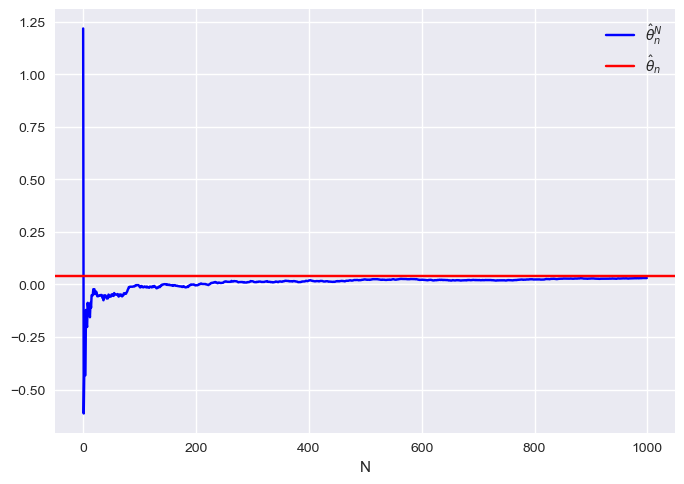

In [44]:
# Answer
N = 1000

# Calcul de la vraisemblance et de l'estimateur Monte-Carlo
thetas = prior.rvs(size=N)
# Compléter
M = np.zeros(N)
m = np.zeros(N)
MC = np.zeros(N)
for i in range(N):
    M[i] = thetas[i] * stats.norm(thetas[i], scale=1).pdf(X).prod()
    m[i] = stats.norm(thetas[i], scale=1).pdf(X).prod()
    MC[i] = np.sum(M)/np.sum(m)


# Tracé du graphique
fig = plt.figure()
plt.plot(np.arange(N), MC, color='blue', label="$\\hat\\theta_n^N$")
plt.axhline(X.mean() * n/(n+1), color="red", label="$\\hat\\theta_n$")
plt.xlabel('N')
plt.legend();

Exemple :

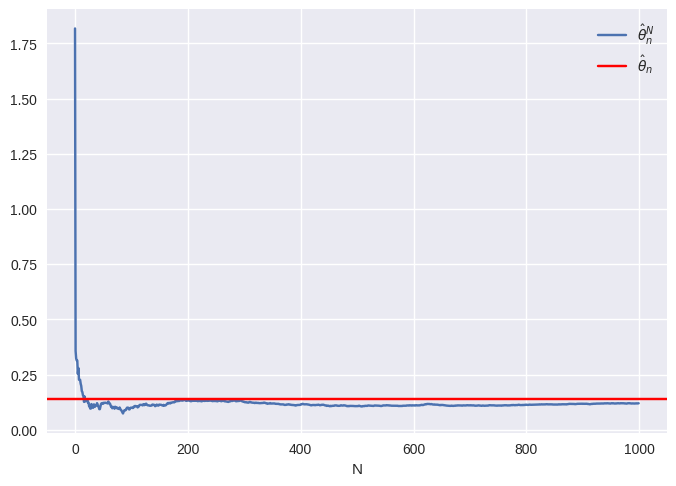

In [5]:
fig

# Exercice 2 : Bayes, Cauchy et Gauss <a id="part2"></a>
>Dans un cadre bayésien, on considère que la loi a priori sur ${\boldsymbol \theta}$ est une loi de Cauchy et que, sachant ${\boldsymbol \theta}$, les variables $(X_i)_{1\leq i\leq n}$ sont i.i.d. selon une loi normale de moyenne ${\boldsymbol \theta}$ et de variance 1.
Autrement dit :
\begin{cases}
    \boldsymbol \theta \sim \text{Cauchy} \\
    (X_1, \dots, X_n) | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
    %\mathbf X | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
\end{cases}
>
>**Question 1.**
En notant $\mathbf{X}=(X_1,\dots,X_n)$, donner la formule de la densité $\pi(\cdot|{\bf X})$ de la loi a posteriori et de l'estimateur de Bayes pour la perte quadratique, noté $\hat\theta_n=\hat\theta_n(\mathbf{X})$.

**Réponse :**
…

In [ ]:
#il n'y a pas conjugation, donc on ne peut pas donner une densité a priori explicite qu'on puisse reconnaitre.
#On calculera la moyenne a posteriori avec une approximation comme dans la partie dernière avec MC

>**Question 2.**
En utilisant par exemple la classe `cauchy` de `scipy.stats`, effectuer un tirage suivant la loi de Cauchy (on note $\theta_0$ cette réalisation), puis pour $n=10$ générer des réalisations des variables aléatoires $X_1,\dots,X_n$ i.i.d. selon une loi normale de moyenne $\theta_0$ et de variance 1.

In [66]:
# Answer
prior = stats.cauchy()
n = 10
theta = prior.rvs(size=1, random_state=rng)
print(theta)
# Définition de la loi ptheta de X_1|\theta et échantillonnage
ptheta = stats.norm(loc=theta,scale=1)
X = ptheta.rvs(size=n, random_state=rng)

[0.61861418]


>**Question 3.**
En déduire un estimateur Monte-Carlo $\hat\theta_n^N=\hat\theta_n^N(\bf{X})$ de l'estimateur de Bayes $\hat\theta_n$. L'implémenter et le représenter pour $N$ allant par exemple de $1$ à $500$. 

**Réponse :**
…

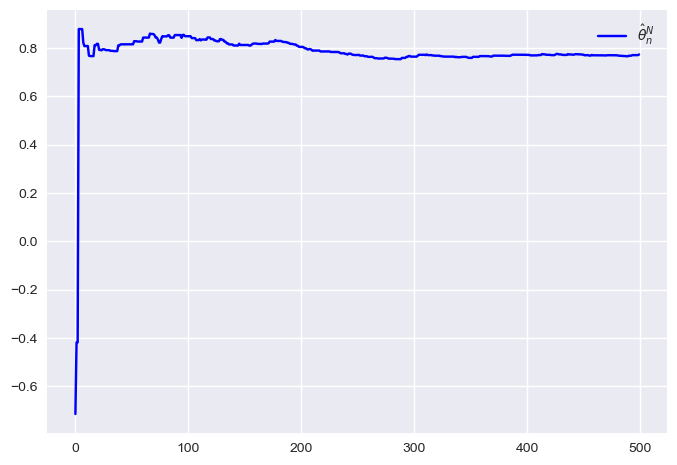

In [68]:
#Comme en avant:

N = 500
thetas = prior.rvs(size=N, random_state=rng)

MC = np.zeros(N)
m = np.zeros(N)
M = np.zeros(N)
for i in range(N):
    M[i] = thetas[i]*stats.norm(thetas[i],scale=1).pdf(X).prod()
    m[i] = stats.norm(thetas[i],scale=1).pdf(X).prod()
    MC[i] = np.sum(M)/np.sum(m)

fig , ax = plt.subplots()
ax.plot(np.arange(N), MC, color = 'blue', label='$\\hat\\theta_n^N$')
ax.legend()
plt.show()



>**Question 4.**
Dans un cadre général, supposons qu'on veuille simuler selon la loi a posteriori $\Pi[\cdot|{\bf X}]$. Si on adopte une méthode de rejet avec comme loi instrumentale la loi a priori $\Pi$, montrer que la constante optimale $m$ est liée à l'estimateur du maximum de vraisemblance 
$$\hat\theta_n^{MV}=\hat\theta_n^{MV}({\bf X}):=\arg\max_{\theta} p_{\theta}({\bf X}).$$
La méthode du rejet fait-elle explicitement intervenir la densité marginale de $\mathbf X$ ?

**Réponse :**
…

In [ ]:
#la méthode n'utilise pas la densité marginale de X, elle reste dans le seuil

>**Question 5.**
Si on revient au cas particulier précédent avec les mêmes valeurs de ${\bf X}=(X_1,\dots,X_n)$, en déduire une méthode de rejet pour simuler selon la loi a posteriori. Simuler un échantillon de taille $N=500$ selon cette loi a posteriori et afficher un histogramme de l'échantillon obtenu.

**Réponse :**
…

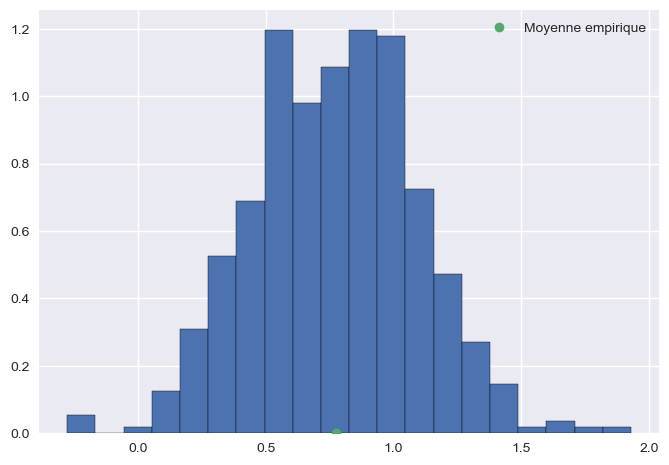

In [77]:
# Answer
unif = stats.uniform()
mle = X.mean()

N = 500

sample = []
while len(sample) < N:
    # Échantillonnage d'une proposition et d'un seuil, calcul du ratio d'acceptation
    #threshold se correspond a l'estimateur du max de vraisemblance de (X1,....,Xn)|theta
    theta = prior.rvs(random_state=rng,size=1)
    crit = np.exp(-len(X)/2 * (mle-theta)**2)
    threshold = unif.rvs(random_state=rng, size=1)
    # Fin compléter
    if threshold <= crit:
        sample.append(theta)

sample = np.asarray(sample)

# Affichage de l'histogramme et de la moyenne empirique
plt.figure()
plt.hist(sample,density=True, edgecolor='black', bins=20)
plt.plot(sample.mean(), 0, 'o', label="Moyenne empirique")
plt.legend();

>**Question 6.**
En déduire un nouvel estimateur $\tilde\theta_n^N$ de $\hat\theta_n$. Sur un même graphique, représenter pour $N$ allant par exemple de 1 à 500 l'évolution des deux estimateurs $\tilde\theta_n^N$ et $\hat\theta_n^N$.

**Réponse :**
…

0.6608261097889614


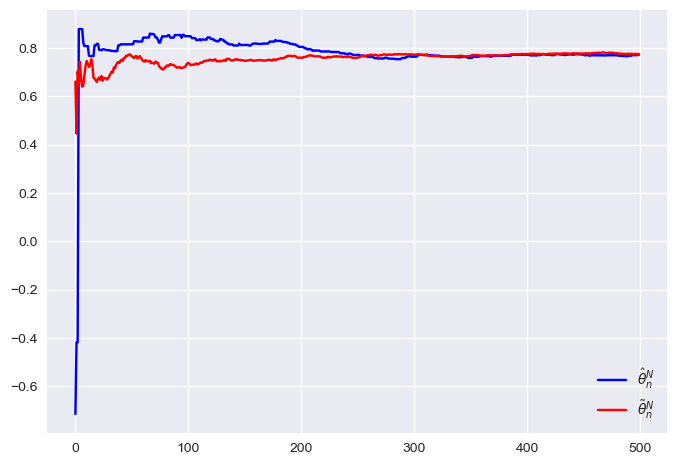

In [80]:
#on veut estimer la moyenne a posteriori avec les simulations qu'on a fait. Donc, en prenant la moyenne empirique de
#l'échantillon générée on a:

S = sample.cumsum()/np.arange(1,N+1)
print(S[0])

plt.figure()
plt.plot()
plt.plot(np.arange(N), MC, color = 'blue', label='$\\hat\\theta_n^N$')
plt.plot(np.arange(N), S, color='red', label='$\\tilde\\theta_n^N$')
plt.legend();

# Exercice 3 : Somme d'exponentielles et conditionnement <a id="part3"></a>
>Soit $X$ et $Y$ deux variables indépendantes suivant respectivement des lois exponentielles de paramètres 1 et 2.
>On appelle $S = X+Y$ et on souhaite estimer $p=\mathbb{P}(X+Y>5)$.
>
>**Question 1.**
Pour la méthode Monte-Carlo classique, représenter l'évolution (en fonction de $n$) de l'estimateur de $p$ (avec son intervalle de confiance) et de celui de la variance limite $\sigma^2$.

**Réponse :**
…

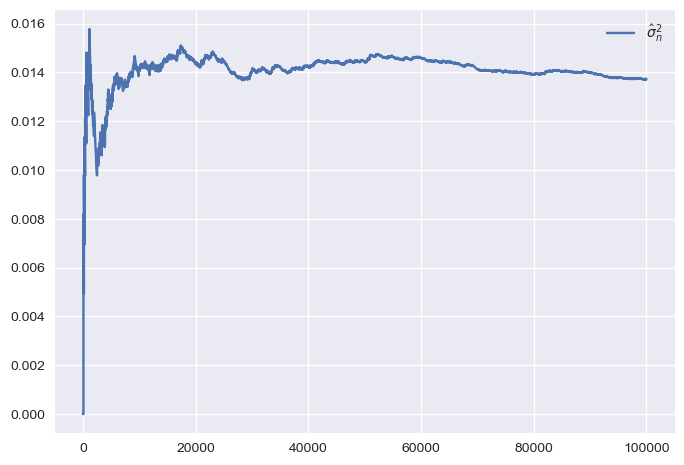

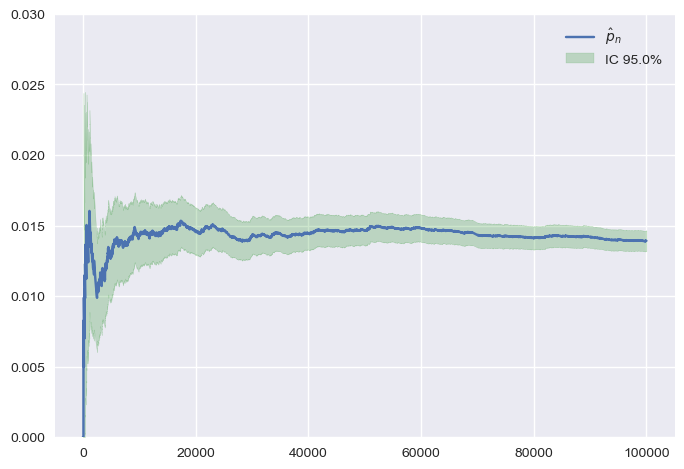

In [97]:
# Answer
# Lois utiles
norm = stats.norm()
X = stats.expon(scale=1)
Y = stats.expon(scale=1/2)

level = 0.05
n = 100000
threshold = 5

# Échantillonnage et calcul de S_n
X_n = X.rvs(random_state=rng, size=n)
Y_n = Y.rvs(random_state=rng, size=n)
S_n = ((X_n+Y_n)>=5)


# Calcul de l'estimateur Monte-Carlo (estMC), de l'estimateur de la variance (estvar) et du rayon de l'intervalle de confiance (ic_bound)
n_range = np.arange(1, n+1)
estMC = S_n.cumsum()/n_range
estvar = estMC - estMC**2#qui convergera vers p(1-p)
ic_bound = norm.ppf(1-level/2)*np.sqrt(estvar/n_range)

# Figures
plt.figure()
plt.plot(n_range, estvar, label="$\\hat \\sigma_n^2$")
plt.legend()

plt.figure()
plt.plot(n_range, estMC, label="$\\hat{{p}}_n$")
plt.fill_between(n_range, estMC+ic_bound, estMC-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.ylim(0, .03)
plt.legend();

>**Question 2.**
Soit $y>0$.
Quelle est la loi de $S$ sachant $Y=y$ ? En déduire $\mathbb{E}[\mathbf{1}_{S>5}|Y=y]$ et une méthode par conditionnement pour estimer $p$.
Tracer l'évolution du nouvel estimateur et de son intervalle de confiance,
puis représenter le gain en variance par rapport à l'estimateur Monte-Carlo standard.

**Réponse :**
…

[0.03607919 0.00964696 0.02265735 ... 0.05401966 0.00936891 0.01837133]
Gain en variance : 44.37782795949408


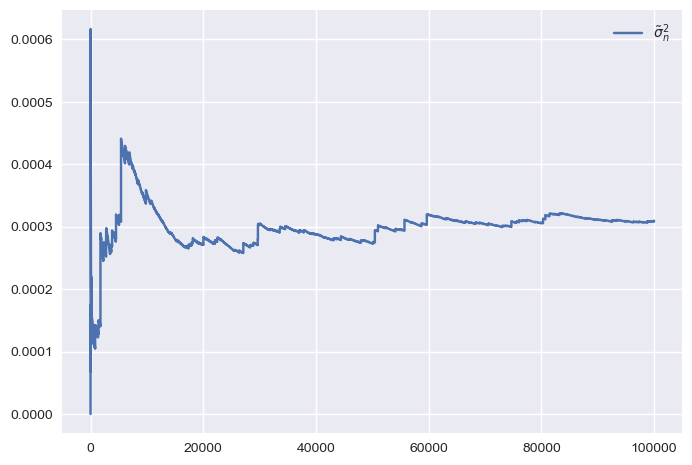

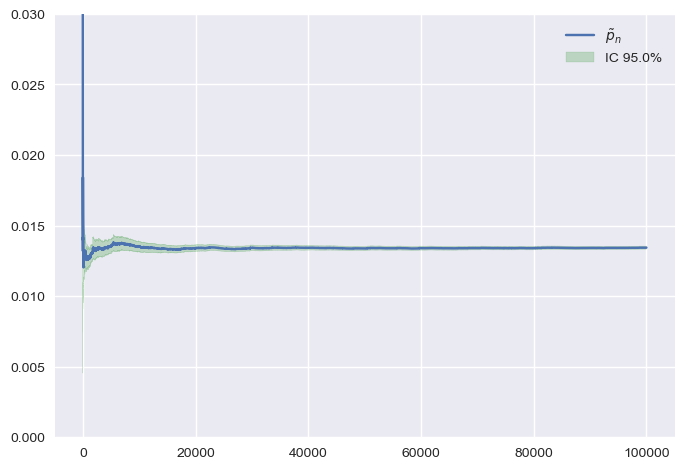

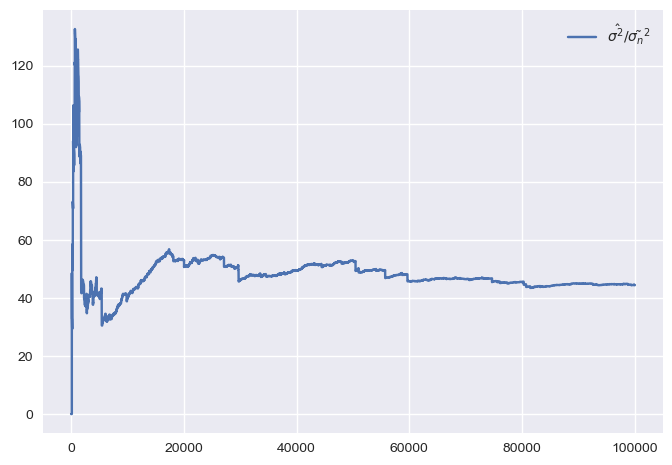

In [ ]:
#la loi conditionnelle est une exponentielle translatée de scale=1 et loc=y
#si on prend les Y_n simulées a la partie dernière, on a:


# Échantillonnage et calcul de E[1_{S_n>5}|Y_n]
esp_n = 1-X.cdf(5-Y_n) #qui est l'esperance pour chaque terme de la simulation

# Calcul de l'estimateur Monte-Carlo (estMC_cond), de l'estimateur de la variance (estvar_cond) et du rayon de l'intervalle de confiance (ic_bound_cond)
estMC_cond = esp_n.cumsum()/n_range
estvar_cond = (esp_n**2).cumsum()/n_range - estMC_cond**2
ic_bound_cond = norm.ppf(1-level/2) * np.sqrt(estvar_cond/n_range)

print("Gain en variance :", estvar[-1] / estvar_cond[-1])

# Figures
plt.figure()
plt.plot(n_range, estvar_cond, label="$\\tilde \\sigma_n^2$")
plt.legend()

plt.figure()
plt.plot(n_range, estMC_cond, label="$\\tilde{{p}}_n$")
plt.fill_between(n_range, estMC_cond+ic_bound_cond, estMC_cond-ic_bound_cond, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.ylim(0, .03)
plt.legend()

plt.figure()
plt.plot(n_range, estvar / np.fmax(estvar_cond, 1e-6), label="$\\hat{{\\sigma^2}} / \\tilde{{\\sigma_n}}^2$")
plt.legend();

>**Question 3.**
Déterminer la loi de $S$ et en déduire une approximation de $p$.

**Réponse :**
…

0.013430494068408448


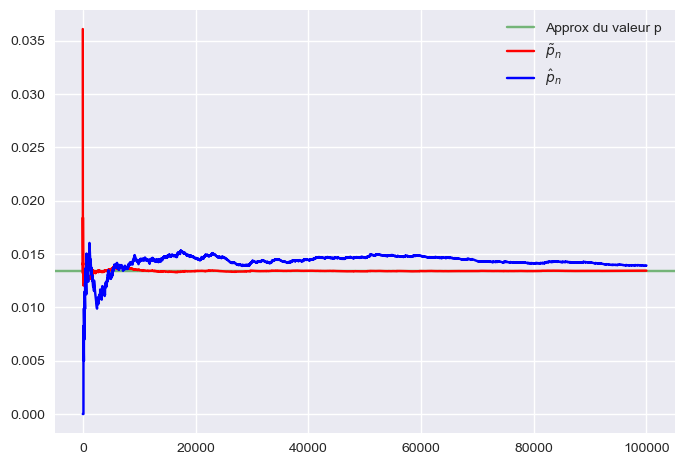

In [103]:
#on commence en écrivant la densité jointe de (X,Y) = exp(-x)2exp(-2y)1_x>=0 * 1_y>=0
#avec le théoreme de changement de variables, S = X+Y et f_S,Y(s,y) = f_X,Y(s(x,y), y) * |J| où s(x,y) = x+y, et x = s-y
#le jacobien du changement est |J| = |dX/dS * dY/dY - dX/dY * dY/dS| = 1
#donc,f_S,Y(s,y) = exp(-(s-y))2exp(-2y)1_s>=y * 1_y>=0
#si on intégre par rapport a y, on obtient la marginale de S comme 2*(exp(-s)-exp(-2s))1_s>=0, ainsi on calcule la P(S>5)
#et on trouve que cette probabilité se correspond à:
print(2*np.exp(-5)-np.exp(-10))

plt.figure()
plt.axhline(2*np.exp(-5)-np.exp(-10), color='green', alpha=0.5, label="Approx du valeur p")
plt.plot(n_range, estMC_cond, color='red', label="$\\tilde{{p}}_n$")
plt.plot(n_range, estMC, color='blue', label="$\\hat{{p}}_n$")
plt.legend()
plt.show()



# Exercice 4 : Test du rapport de vraisemblance <a id="part4"></a>
>Soient $N \in \mathbb N^*$, $\theta \in ]0, 1[$ et $X\sim\text{Bin}(N,\theta)$.
Pour $\theta_0 \in ]0, 1[$, on souhaite tester $H_0:\theta=\theta_0$ contre  $H_1:\theta\neq\theta_0$ au niveau $\alpha \in ]0, 1[$.
Pour ce faire, on considère la statistique
$$S(X)=-2\log\frac{\theta_0^X(1-\theta_0)^{N-X}}{\hat \theta_N^X(1-\hat \theta_N)^{N-X}},$$
où $\hat \theta_N$ est l'estimateur du maximum de vraisemblance (on prend comme d'habitude la convention usuelle $0^0=1$),
et le test du rapport de vraisemblance : $T(X) = \mathbf 1_{S(X) > F^{-1}(1-\alpha)}$,
où $F$ est la fonction de répartition de $S(X)$ sous $H_0$. 
>
>**Question 1.**
Pour les besoins numériques, on considère pour le moment $N = 10$, $\theta_0 = 1/2$ et on introduit $\theta_1 = 0.1$.
Simuler deux observations, l'une sous $H_0$ selon $\text{Bin}(N, \theta_0)$ et l'autre sous $H_1$ suivant $\text{Bin}(N,\theta_1)$.

In [ ]:
# Answer
N = 10
theta0 = 0.5
theta1 = 0.1

# Lois sous H0 et H1
# Compléter

# Fin compléter

# Deux observations Xobs0 et Xobs1
# Compléter

# Fin compléter

# Affichage des observations
print("Observation sous H0 :", Xobs0)
print("Observation sous H1 :", Xobs1)

>**Question 2.**
Déterminer l'estimateur du maximum de vraisemblance $\hat \theta_N$.
En déduire une expression de $S(X)$ en fonction de $\theta_0$, $N$ et $X$ et l'implémenter dans la fonction ci-dessous.
Attention, pour respecter la convention $0^0 = 1$, on pourra utiliser une expression de la forme `np.where(x!=0, x, 1)`.

**Réponse :**
…

In [ ]:
# Answer
def test_statistics(x, theta, N):
    """
        x : observation
        theta : valeur de theta0
        N : valeur de N dans la loi Bin(N, theta0)
    """
    # Retourne la valeur de la statistique de test pour l'observation x
    # Compléter

    # Fin compléter

# Affichage des statistiques de test
print("S(X) sous H0 :", test_statistics(x=Xobs0, theta=theta0, N=N))
print("S(X) sous H1 :", test_statistics(x=Xobs1, theta=theta0, N=N))
# Fin compléter

>**Question 3.**
Soit $x \in \{0, \dots, N\}$ une réalisation de $X$.
On peut montrer qu'ici la $p$-valeur du test $T(x)$ s'écrit :
$$
    \alpha_0(x) = \mathbb P_{\theta_0}(S(X) \ge S(x)).
$$
En déduire un estimateur Monte-Carlo de la $p$-valeur $\alpha_0(x)$
et afficher ses réalisations pour les deux observations générées à la question précédente.

**Réponse :**
…

In [ ]:
# Answer
n = 10**5

def pvalue(x, theta, N, n=n):
    """
        x : observation
        theta : valeur de theta0
        N : valeur de N dans la loi Bin(N, theta0)
        n : taille de l'approximation Monte-Carlo
    """
    # Calcul de l'estimateur Monte-Carlo de la p-valeur.
    # Doit se terminer par return…
    dist = stats.binom(n=N, p=theta)
    # Compléter

    # Fin compléter

# Affichage des approximations des p-valeurs
print("Approximation de la p-valeur sous H0 :", pvalue(x=Xobs0, theta=theta0, N=N))
print("Approximation de la p-valeur sous H1 :", pvalue(x=Xobs1, theta=theta0, N=N))

>**Question 4.**
On peut montrer d'une part que la $p$-valeur $\alpha_0(x)$ peut aussi s'écrire $\alpha_0(x) = 1 - F(S(x)^-)$,
d'autre part que, sous $H_0$, $S(X) \xrightarrow[N\to\infty]{\text{Loi}} \chi_1^2$.
En déduire une manière d'approcher la $p$-valeur $\alpha_0(x)$ lorsque $N$ est grand.
Afficher cette approximation pour les deux observations considérées ($N=10$), puis pour de nouvelles observations avec $N=10^3$.

**Réponse :**
…

In [ ]:
# Answer

# Exercice 5 : Vecteur gaussien et exponential tilting <a id="part5"></a>
>On souhaite estimer $p=\mathbb{P}((X,Y)\in{\cal R})$ où $(X,Y)$ est un vecteur gaussien centré de matrice de covariance
$$\Gamma=\left[\begin{array}{cc}
4&-1\\
-1&4\end{array}\right],$$
et ${\cal R}=\{(x,y),\ x\geq a,\ y\geq a\}$, avec successivement $a=1$, $a=3$, $a=10$.
>
>**Question 1.**
Pour chaque valeur de $a$, estimer $p$ par Monte-Carlo classique.
On pourra afficher l'évolution des estimateurs Monte-Carlo.

**Réponse :**
…

In [ ]:
# Answer
multinorm = stats.multivariate_normal(cov=[[4, -1],
                                          [-1, 4]])

n = 10**5
thresholds = [1, 3, 10]

# Echantillonnage et calcul de l'estimateur Monte-Carlo
n_range = np.arange(1, n+1)
plt.figure()
# Echantillonnage
# Compléter

# Fin compléter
# Calcul de l'estimateur Monte-Carlo et affichage de son évolution
for threshold in thresholds:
    # Compléter

    # Fin compléter
    print(f"Estimation Monte-Carlo pour a={threshold} : {estMC[-1]}")
    plt.plot(n_range, estMC, label=f"$\\hat{{p}}_n$ pour a={threshold}")
plt.ylim(-.005, .08)
plt.legend();

>**Question 2.**
Déterminer le point $(x_0,y_0)$ de ${\cal R}$ où la densité de la loi normale ${\cal N}(0,\Gamma)$ est maximale
(un argument graphique suffit).

**Réponse :**
…

(-7.0, 7.0, -7.0, 7.0)

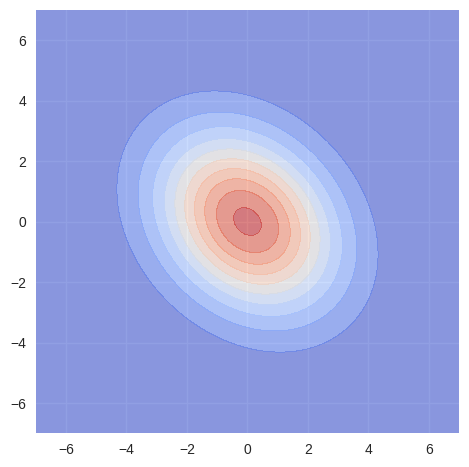

In [21]:
U, V = np.meshgrid(np.linspace(-7, 7, num=100), np.linspace(-7, 7, num=100))  # Pairs of points
plt.figure()
plt.contourf(U, V, multinorm.pdf(np.c_[U.ravel(), V.ravel()]).reshape(U.shape), levels=10, cmap="coolwarm", alpha=0.6)
plt.axis('image')

>**Question 3.**
Proposer une méthode d'échantillonnage préférentiel fondée sur la densité ${\cal N}((x_0,y_0),\Gamma)$ et comparer aux résultats de la première question.

**Réponse :**
…

In [ ]:
# Answer
# Echantillonnage et calcul de l'estimateur Monte-Carlo
plt.figure()
for threshold in thresholds:
    # Compléter

    # Fin compléter
    print(f"Estimation Monte-Carlo par échantillonnage préférentiel pour a={threshold} : {estMC[-1]}")
    plt.plot(n_range, estMC, label=f"$\\tilde{{p}}_n$ pour a={threshold}")
plt.ylim(-.005, .08)
plt.legend();

>**Question 4.**
Pour $a=10$, afficher l'évolution des estimateurs des écarts types limites des méthodes Monte-Carlo par échantillonnage préférentiel fondés sur des densités instrumentales de la forme ${\cal N}((x_0,y_0),\delta\Gamma)$ pour différentes valeurs de $\delta$.

**Réponse :**
…

In [ ]:
# Answer
deltas = [1e-2, 1e-1, 1, 1e1, 1e2]

# Echantillonnage, calcul de l'estimateur Monte-Carlo et de la variance estimée
plt.figure()
for delta in deltas:
    # Compléter

    # Fin compléter
    plt.plot(n_range, np.sqrt(estvar), label=f"$\\tilde \\sigma_n$ pour delta={delta}")
plt.ylim(-5e-18, 5e-16)
plt.legend();

# Exercice 6 : Marche aléatoire avec dérive et échantillonnage préférentiel <a id="part6"></a>
>Soient $(X_n)$ une suite de variables gaussiennes indépendantes suivant ${\cal N}(-m,1)$ avec $m>0$, et $S_n=X_1+\dots+X_n$. Les réels $a<0$ et $b>0$ étant fixés, on considère le temps d'arrêt $N=\min\{n:\ S_n<a\ \mbox{ou}\ S_n>b\}$ et on s'intéresse à la probabilité $p=\mathbb{P}(S_N>b)$ que la marche aléatoire $(S_n)$ sorte de l'intervalle $[a,b]$ par le haut.
>
>**Question 1.**
Montrer que le temps d'arrêt $N$ est presque sûrement fini.

**Réponse :**
…

>**Question 2.**
Pour $m=1$, $a=-50$ et $b=5$, simuler et représenter une trajectoire $(S_n)_{1\leq n\leq N}$.

**Réponse :**
…

In [ ]:
# Answer
m = 1  # Dérive
a, b = -50, 5  # Bornes
n = 10**3  # Taille de l'échantillon X, supposée plus grande que N

# Loi de chaque pas
# Compléter

# Fin compléter

# Échantillonnage et calcul de la marche aléatoire
# Compléter

# Fin compléter

print("Temps d'arrêt :", S.size)

fig = plt.figure()
plt.plot(np.arange(1, S.size+1), S, label="$(S_n)_{1 \\leq n \\leq N}$")
plt.legend();

Example :

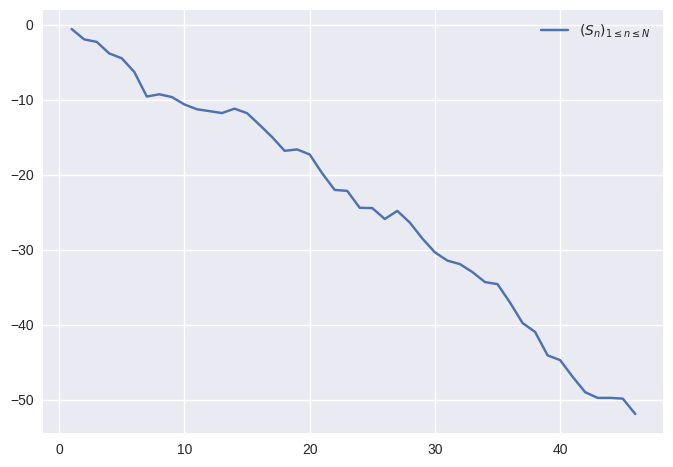

In [25]:
fig

>**Question 3.**
Proposer un estimateur $\hat p_k$ de $p$ construit sur $k$ simulations successives de trajectoires. L'implémenter pour $k=1000$ ?

**Réponse :**
…

In [ ]:
# Answer
k = 10**3

# Échantillonnage et calcul des marches aléatoires
S_exit = np.empty(k)  # Value of S_N
for ik in range(k):
    # Compléter

    # Fin compléter

# Calcul de l'estimateur Monte-Carlo
# Compléter

# Fin compléter

print("Estimateur Monte-Carlo :", estMC)

**Réponse :**
…

>**Question 4.**
Plutôt que de simuler $X$ suivant la loi ${\cal N}(-m,1)$, on simule $X'$ suivant la loi ${\cal N}(m,1)$. On note $S'_n$ la marche aléatoire obtenue et $N'$ le temps de sortie de l'intervalle $[a,b]$.
On peut alors montrer que le rapport de vraisemblance $f(s)/g(s)$, où $f$ et $g$ sont les densités respectives des variables aléatoires $S_{N}$ et $S'_{N'}$,
vaut $f(s)/g(s)=\exp(-2ms)$.
En déduire un nouvel estimateur $\tilde p_k$ de $p$ construit sur $k$ simulations successives, et illustrer sa convergence en fonction de $k$.

**Réponse :**
…

In [ ]:
# Answer
# Loi de chaque pas de S'
# Compléter

# Fin compléter

# Échantillonnage et calcul des marches aléatoires
S_exit = np.empty(k)  # Value of S'_N'
for ik in range(k):
    # Compléter

    # Fin compléter

# Calcul de l'estimateur Monte-Carlo par échantillonnage préférentiel
n_range = np.arange(1, k+1)
# Compléter

# Fin compléter

print("Estimateur Monte-Carlo par échantillonnage préférentiel :", estMCbis[-1])

# Figure
plt.figure()
plt.plot(n_range, estMCbis, label="$\\tilde{{p}}_k$")
plt.legend();

>**Question 5.**
Déduire de la forme de $\tilde p_k$ que $p\leq\exp(-2mb)$. Ceci est-il en accord avec le résultat obtenu par Monte-Carlo standard ?

**Réponse :**
…